# 소규모 데이터셋에서 convnet 사용하기

---
## Kaggle Dogs vs Cats 데이터셋 
https://www.kaggle.com/c/dogs-vs-cats/data

25,000개의 강아지와 고양이 이미지(클래스마다 12,500개)  

### 3개의 서브셋으로 나누기
1. 훈련세트: 클래스마다 1,000개의 샘플
2. 검증세트: 클래스마다 500개의 샘플
3. 테스트세트: 클래스마다 500개의 샘플

In [1]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '../datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '../datasets/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

복사가 잘 되었는지 확인하기!!\
각 분할(훈련/검증/테스트)에 들어 있는 사진의 개수를 카운트

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 네트워크 구성하기
Conv2D(relu 활성화 함수 사용)와 MaxPooling2D 층을 번갈아 쌓은 **컨브넷** 만들기\
층을 더 쌓아서 네트워크의 용량 늘리고 Flatten 층의 크기가 너무 커지지 않도록 특성 맵의 크기를 줄일 수 있음!

```python
model.add(layers.MaxPooling2D((2,2)))
```
**다운샘플링**: 가중치 개수 줄이기 + 필터의 공간적 계층구조 만들기

```python
model.add(layers.Dense(1, activation='sigmoid'))
```
이진분류이므로,, **sigmoid** + 유닛 1개

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooli

2022-03-22 16:03:49.316836: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-22 16:03:49.316920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 옵티마이저 설정
출력층이 1유닛 sigmoid이므로 손실함수(loss): 이진 크로스엔트로피(**binary_crossentropy**)

In [4]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/Users/youngeun/miniforge3/envs/venv/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## ImageDataGenerator 사용해 디렉토리에서 이미지 읽기
### 네트워크에 이미지 주입하기 위해 **데이터 전처리**
데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 전처리 필요!

1. 사진 파일 읽기.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩.
3. 부동 소수 타입의 텐서로 변환.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정(신경망은 작은 입력 값을 선호하기 때문).

Keras의 **ImageDataGenerator** 클래스는 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 생성. 

```python
ImageDataGenerator(rescale=1./255)
```
모든 이미지를 1/225로 **스케일 조정**

``` python
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
```
**train_dir:** 타깃 디렉토리  
**target_size=(150, 150):** 모든 이미지의 크기를 150 × 150로 변경  
**class_mode='binary':** binary_crossentropy 손실을 사용하므로 이진 레이블 필요

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20, 
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150,150),
        batch_size=20, 
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


제너레이터의 출력은 150 × 150 RGB 이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)\
각 배치에는 **20**개의 샘플(배치 크기) 

제너레이터는 이 배치를 무한으로 만들기 때문에 반복 루프안의 어디에선가 break 문을 사용!

In [6]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break 

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


## 배치 제네레이터를 사용해 모델 훈련하기
하나의 에포크 정의하기 위해 **제너레이터로부터 얼마나 많은 샘플 뽑을지 지정**
* steps_per_epoch: 전체 훈련데이터 2,000개 / train_generator 배치 20개 = 100
* validation_step: 전체 검증데이터 1,000개 / validation_generator 배치 20개 = 50

In [7]:
# 배치 제네레이터를 사용해 모델 훈련
history = model.fit_generator(
      train_generator,
      # 하나의 에포크 정의하기 위해 제너레이터로부터 얼마나 많은 샘플 뽑을지 지정
      steps_per_epoch=100, # 전체 훈련데이터 2,000개 / train_generator 배치 20개 = 100
      epochs=30, 
      validation_data=validation_generator,
      validation_steps=50) # 전체 검증데이터 1,000개 / validation_generator 배치 20개 = 50

Epoch 1/30


/var/folders/9_/z_nr8_hd32x51b1zx2flsn080000gn/T/ipykernel_18098/1636659114.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-03-22 16:03:49.675359: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-22 16:03:50.035140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6896 - acc: 0.5415

2022-03-22 16:03:57.391419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 72ms/step - loss: 0.6896 - acc: 0.5415 - val_loss: 0.6708 - val_acc: 0.5980
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6520 - acc: 0.6120 - val_loss: 0.6491 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5985 - acc: 0.6875 - val_loss: 0.6175 - val_acc: 0.6490
Epoch 4/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5627 - acc: 0.7115 - val_loss: 0.6177 - val_acc: 0.6510
Epoch 5/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5351 - acc: 0.7330 - val_loss: 0.5872 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5043 - acc: 0.7590 - val_loss: 0.6069 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 7s 69ms/step - loss: 0.4758 - acc: 0.7720 - val_loss: 0.5607 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 7s 69ms/step - loss: 0.446

훈련 끝나면 모델 저장하기:

In [8]:
model.save('cats_and_dogs_small_1.h5')

훈련 정확도 & 손실 그래프 그리기:

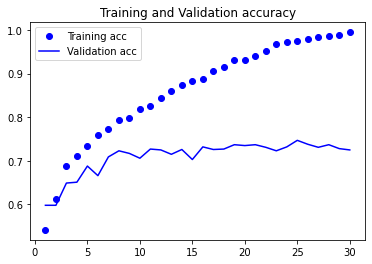

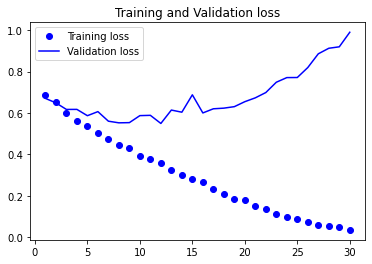

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## 데이터 증식 사용하기
과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생..

### 데이터 증식
기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법\
keras에서는 **ImageDataGenerator**를 이용해 이미지에 여러 종류의 랜덤 변환을 적용할 수 있다
* rotation_range: 랜덤하게 사진 회전 각도
* width_shift_range, height_shift_range: 사진 수평, 수직으로 핸덤 평행이동(전체 너비와 높이에 대한 비율)
* shear_range: 랜덤하게 전단변환
* zoom_range: 랜덤 사진확대
* horizontal_flip: 수평 뒤집기
* fill_mode: 이동으로 인해 새로 픽셀 어떻게 생성할지(nearsat: 주변에 있는 픽셀로 채우기)

In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

증식된 이미지 샘플 확인하기:

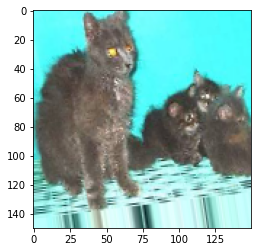

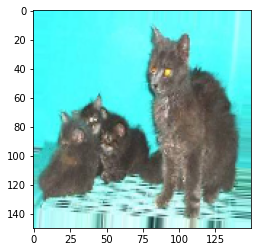

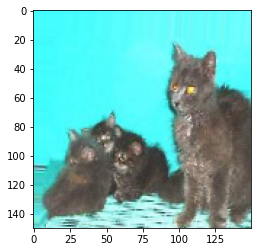

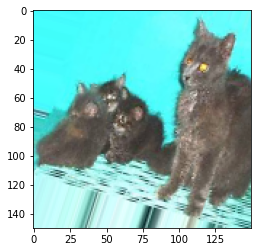

In [11]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[4] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150,150)) # 이미지 읽고 크기 변경

x = image.img_to_array(img) # (150,150,3)크기의 넘파이 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3)크기로 변환

i = 0
# 랜덤하게 변환된 이미지 배치 생성
# 무한 반복되기 때문에 중지 시점 정해주기!
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()

## 드롭아웃을 포함한 모델 정의하기
증식된 이미지는 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 크다\
과대적합을 억제하기 위해 드롭아웃 층 추가하기!

```python
model.add(layers.Dropout(0.5))
```
완전 연결층 전에 **드롭아웃**층 추가

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) 
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # 완전 연결층 전에 드롭아웃층 추가
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/Users/youngeun/miniforge3/envs/venv/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## 데이터 증식 제네레이터를 사용해 컨브넷 훈련하기
검증 데이터와 테스트 세트는 증식 X
> 유의사항: **steps_per_epoch * batch_size**가 **전체 데이터 사이즈보다 크면** 오류발생!! (버전문제)

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/var/folders/9_/z_nr8_hd32x51b1zx2flsn080000gn/T/ipykernel_18098/1371850081.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-03-22 16:07:21.673043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6949 - acc: 0.5045

2022-03-22 16:07:28.927317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 9s 83ms/step - loss: 0.6949 - acc: 0.5045 - val_loss: 0.6865 - val_acc: 0.5010
Epoch 2/100
100/100 [==============================] - 8s 82ms/step - loss: 0.6833 - acc: 0.5580 - val_loss: 0.7181 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6783 - acc: 0.5645 - val_loss: 0.6560 - val_acc: 0.6100
Epoch 4/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6636 - acc: 0.5870 - val_loss: 0.6785 - val_acc: 0.5570
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6438 - acc: 0.6160 - val_loss: 0.6309 - val_acc: 0.6180
Epoch 6/100
100/100 [==============================] - 8s 82ms/step - loss: 0.6266 - acc: 0.6380 - val_loss: 0.6453 - val_acc: 0.6010
Epoch 7/100
100/100 [==============================] - 8s 81ms/step - loss: 0.6210 - acc: 0.6480 - val_loss: 0.6098 - val_acc: 0.6420
Epoch 8/100
100/100 [==============================] - 8s 81ms/step - loss

Epoch 62/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4198 - acc: 0.8065 - val_loss: 0.4953 - val_acc: 0.7820
Epoch 63/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4369 - acc: 0.8025 - val_loss: 0.5540 - val_acc: 0.7290
Epoch 64/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4476 - acc: 0.7950 - val_loss: 0.4360 - val_acc: 0.7940
Epoch 65/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4192 - acc: 0.8160 - val_loss: 0.4308 - val_acc: 0.8050
Epoch 66/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4286 - acc: 0.8045 - val_loss: 0.4591 - val_acc: 0.7880
Epoch 67/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4398 - acc: 0.7935 - val_loss: 0.4114 - val_acc: 0.8090
Epoch 68/100
100/100 [==============================] - 8s 82ms/step - loss: 0.4264 - acc: 0.8050 - val_loss: 0.4500 - val_acc: 0.7960
Epoch 69/100
100/100 [==============================] -

모델 저장하기:

In [14]:
model.save('cats_and_dogs_small_2.h5')

결과 그래프 그리기:

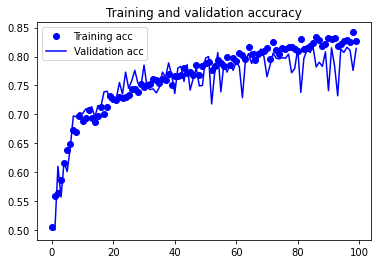

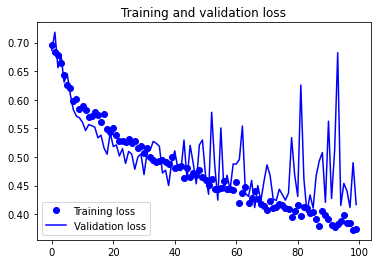

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

검증, 훈련 그래프가 가까워짐! -> 아까보다 과대적합 문제가 해결되었다~